# project code

In [82]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly as py
import plotly.figure_factory as ff
import numpy as np
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from surprise import Dataset, Reader, KNNBasic
#from surprise.model_selection import train_test_split
from surprise import accuracy

In [47]:
# read in beer reviews file
data = pd.read_csv("beer_reviews.csv")

In [48]:
# print first 10 rows
data.head(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986.0
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213.0
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215.0
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969.0
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883.0
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159.0
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159.0
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159.0
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159.0
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159.0


In [49]:
# preprocess and clean the data
# remove unnecessary columns and values
# remove null values
data = data.drop(["brewery_id"], axis=1)
data = data.drop(["review_time"], axis=1)
data = data.drop(["review_profilename"], axis=1)
data = data.drop(["beer_beerid"], axis=1)
data = data.dropna()

data.head()

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
0,Vecchio Birraio,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0
1,Vecchio Birraio,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2
2,Vecchio Birraio,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5
3,Vecchio Birraio,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0
4,Caldera Brewing Company,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7


In [50]:
# sort the data and reset the index
data = data[['brewery_name', 'beer_style', 'beer_name', 'beer_abv', 'review_appearance', 
             'review_aroma', 'review_palate', 'review_taste', 'review_overall']]
data = data.sort_values(by=['brewery_name', 'beer_style', 'beer_name' , 'beer_abv', 'review_overall'])
data = data.reset_index()
data = data.drop(["index"], axis=1)

data.head()

,brewery_name,beer_style,beer_name,beer_abv,review_appearance,review_aroma,review_palate,review_taste,review_overall
0,10 Barrel Brewing Co.,American Amber / Red Ale,Precursor,10.0,3.0,4.0,3.5,3.5,3.5
1,10 Barrel Brewing Co.,American Amber / Red Ale,Precursor,10.0,4.5,3.5,3.5,4.0,3.5
2,10 Barrel Brewing Co.,American Amber / Red Ale,Precursor,10.0,5.0,3.0,4.0,3.0,3.5
3,10 Barrel Brewing Co.,American Amber / Red Ale,Precursor,10.0,4.0,3.5,4.0,4.0,4.0
4,10 Barrel Brewing Co.,American Blonde Ale,10 Barrel Light,4.7,4.5,3.5,4.0,4.0,4.5


In [51]:
# find the mean values
data['review_average'] = data.apply(lambda row: (row["review_overall"] + row["review_aroma"] + 
                                                 row["review_appearance"] + row["review_palate"] + 
                                                 row["review_taste"]) / 5, axis=1)

data = data.drop(data[(data["review_average"] < 1) | (data["review_average"] > 5)].index)

Text(0.5, 1.0, 'The best taste Beer Style')

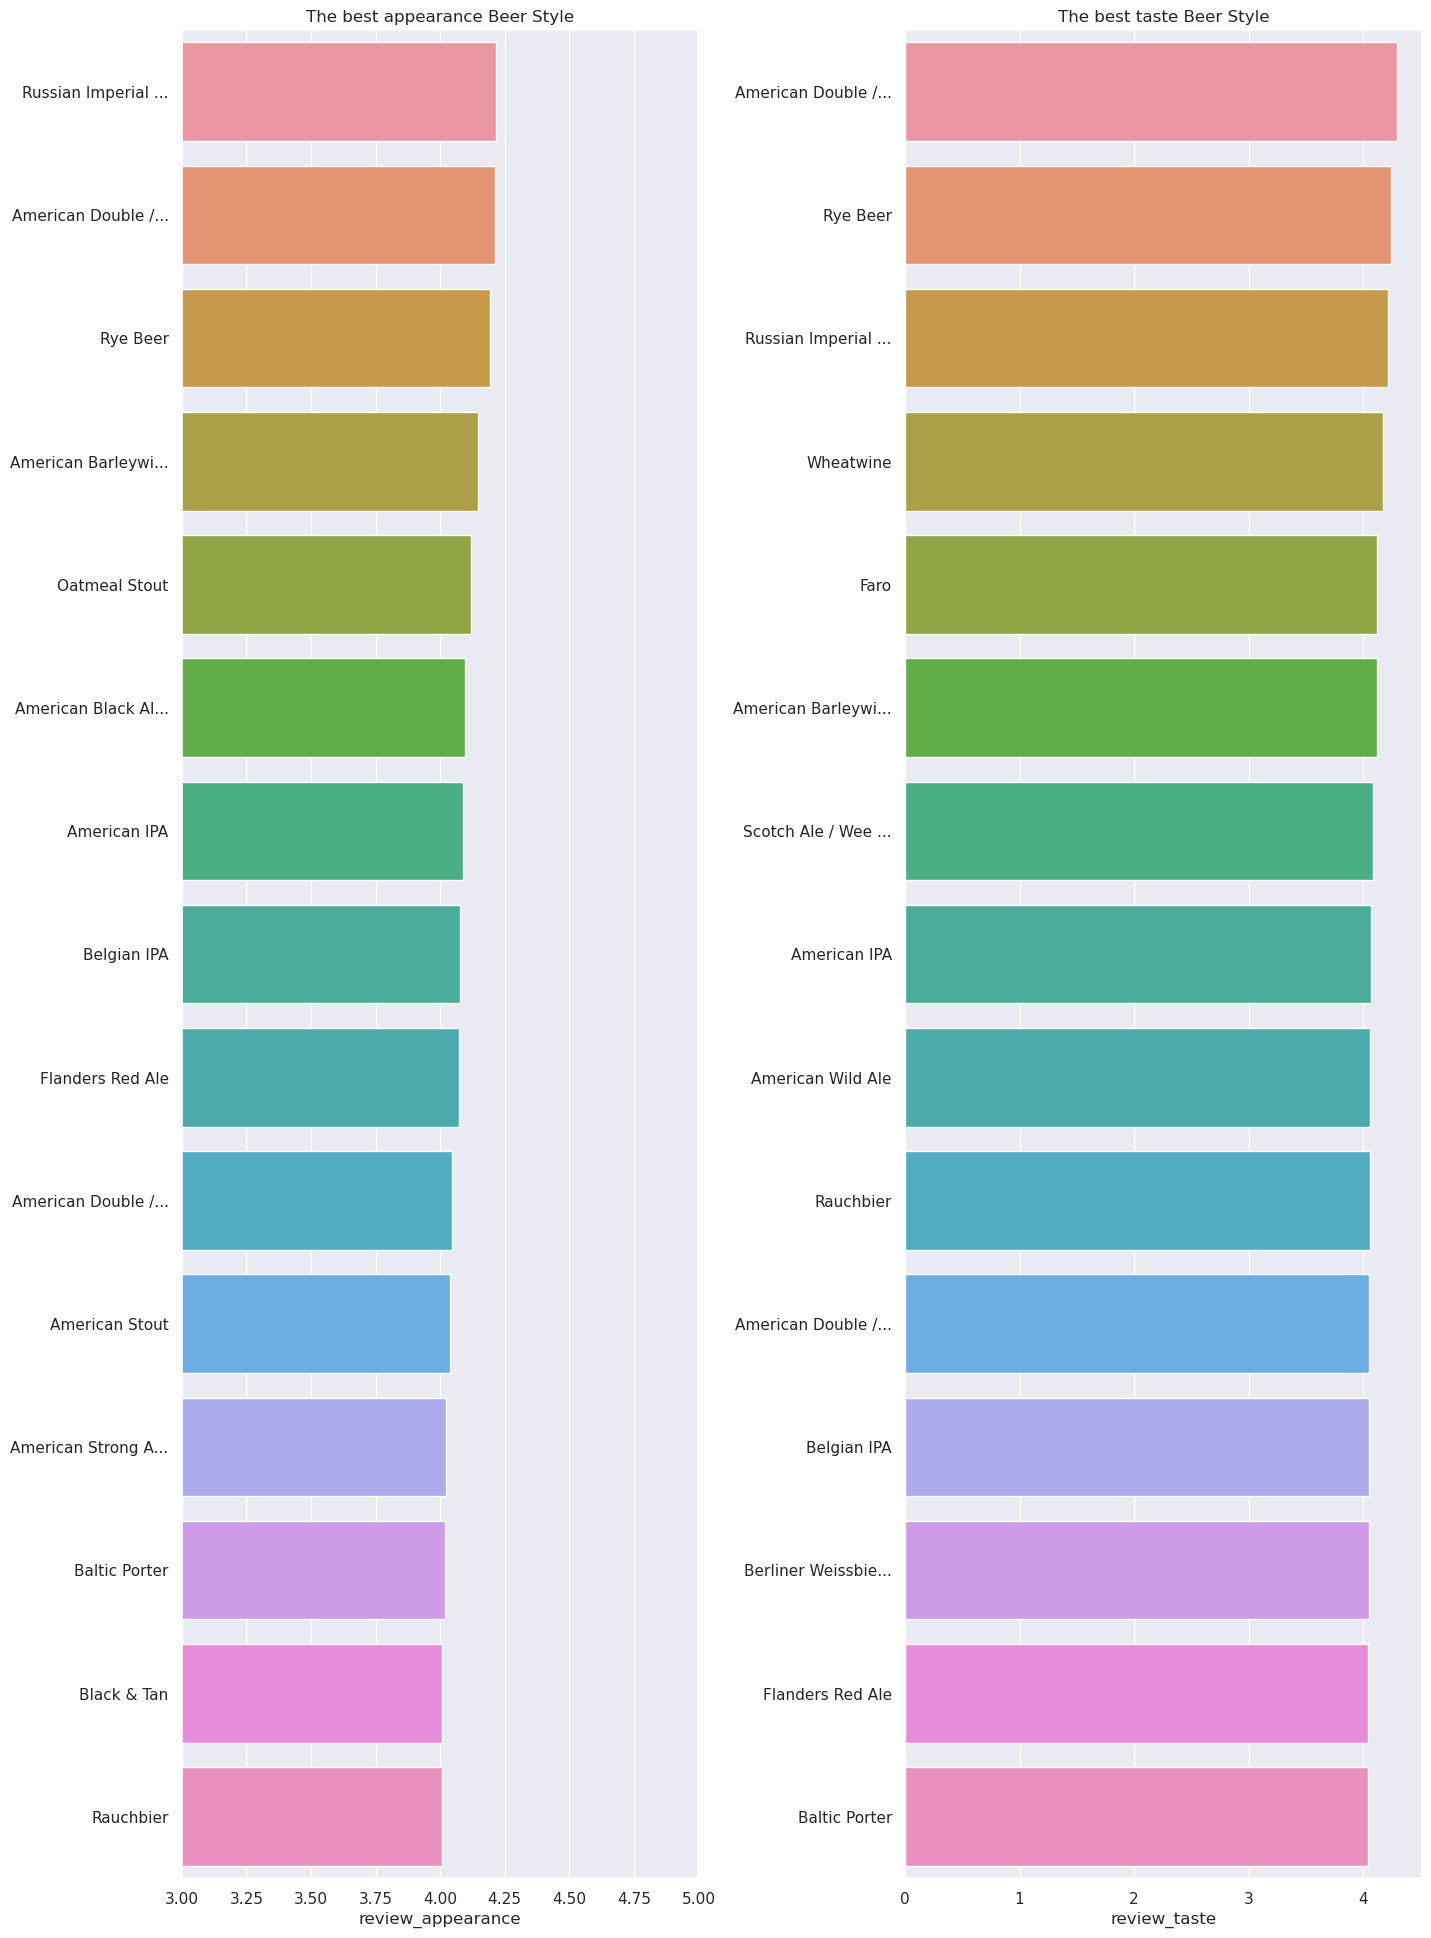

In [52]:
# generate bar plots showing the best appearance and taste based on average scores
def visualization_function_1(name, condition, ax_left, ax_right):
    
    unique_names = data[name].unique()
    length = len(unique_names)
    rev_aver = np.zeros(length)
    rev_taste = np.zeros(length)
    count = np.zeros(length, dtype=np.int32)
    
    for _, row in data.iterrows():
        idx = np.where(unique_names == row[name])
        rev_aver[idx] += row["review_appearance"]
        rev_taste[idx] += row["review_taste"]
        count[idx] += 1
        
  
    for i in range(length):
        if count[i] > condition:
            rev_aver[i] /= count[i]
            rev_taste[i] /= count[i]
        else:
            rev_aver[i] = 1
            rev_taste[i] = 1
            
    zipped_left  = sorted(zip(unique_names, rev_aver), key=lambda x: x[1], reverse=True)
    names_left   = [zipped_left[i][0] for i in range(length)]
    sorted_score = [zipped_left[i][1] for i in range(length)]
    
    zipped_right = sorted(zip(unique_names, rev_taste), key=lambda x: x[1], reverse=True)
    names_right  = [zipped_right[i][0] for i in range(length)]
    sorted_count = [zipped_right[i][1] for i in range(length)]
    
    sns.barplot(x = sorted_score[:15], y = names_left[:15], ax=ax_left)
    ax_left.set_xlim(3, 5)
    ax_left.set_xlabel("review_appearance")
    # limit the length of names
    ax_left.set_yticklabels([i.get_text()[:17] + "..." if len(i.get_text()) > 17 else i.get_text() 
                             for i in ax_left.get_yticklabels()])
    
    sns.barplot(x = sorted_count[:15], y = names_right[:15], ax=ax_right).set_title(name)
    ax_right.set_xlabel("review_taste")
    # limit the length of names
    ax_right.set_yticklabels([i.get_text()[:17] + "..." if len(i.get_text()) > 17 else i.get_text() 
                              for i in ax_right.get_yticklabels()])

sns.set(rc={"axes.grid": True})
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=[16, 24])
fig.subplots_adjust(wspace=0.4)

visualization_function_1("beer_style", 5, axs[0], axs[1])
# visualization_function_1("beer_style", 5, axs[1, 0], axs[1, 1])
# visualization_function_1("beer_name", 5, axs[2, 0], axs[2, 1])

axs[0].set_title("The best appearance Beer Style")
axs[1].set_title("The best taste Beer Style")

# axs[1, 0].set_title("The best styles of beer")
# axs[1, 1].set_title("The most popular styles of beer")

# axs[2, 0].set_title("The best quality beer")
# axs[2, 1].set_title("The most popular beer");

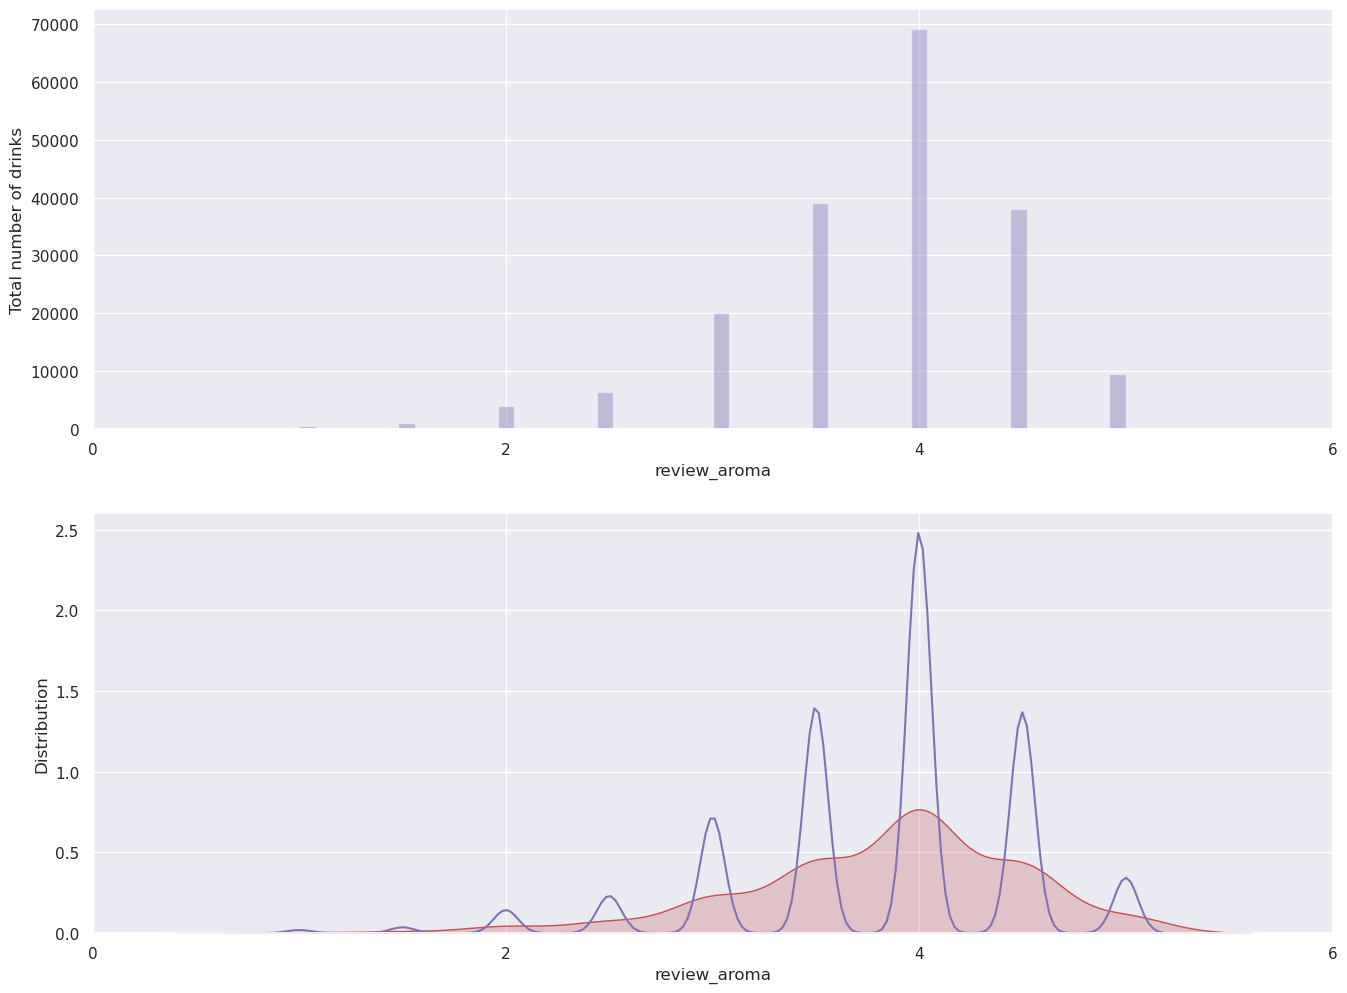

In [53]:
# we look at the hist of some reviews

# data = data.drop(data[data["beer_abv"] > 20].index)
sns.set(rc={"axes.grid": True})
fig, axs = plt.subplots(nrows=2, figsize=[16, 12])
plt.setp(axs, xticks=range(0, 21, 2))

sns.distplot(data["review_aroma"], bins=50, ax=axs[0], kde=False, color="m")
sns.kdeplot(data["review_aroma"], ax=axs[1], color="m", label="Original distribution")
sns.kdeplot(data["review_aroma"], ax=axs[1], color="r", bw=0.3, shade=True, label="Smoothed distribution")

axs[0].set_xlim(0, 6)
axs[0].set_ylabel("Total number of drinks")

axs[1].set_xlim(0, 6)
axs[1].set_xlabel("review_aroma")
axs[1].set_ylabel("Distribution");

In [54]:
# Use only unique beers and breweries for aggregate stats
abv = data[['beer_name','brewery_name','beer_abv']]\
    .drop_duplicates(['beer_name','brewery_name'])\
    .pivot_table(index="brewery_name", aggfunc=("count",'mean','median'))

# Adjust column names
abv.columns = abv.columns.to_series().str.join('_')

# Reset index
abv.reset_index(inplace=True)

# Rename column
abv.rename(columns={'beer_abv_count':'beer_count'}, inplace=True)

# Filter for breweries with at least 4 unique beers
abv_filtered_mean = abv.query('beer_count >= 4')\
    .sort_values('beer_abv_mean', ascending=False)\
    .head(20)\
    .sort_values('beer_abv_mean', ascending=True)

# Plot it
p1 = [go.Bar(x = abv_filtered_mean['beer_abv_mean'] / 100,
             y = abv_filtered_mean['brewery_name'],
             text=abv_filtered_mean['beer_abv_mean'].round(1),
             hoverinfo='x',
             textposition = 'inside',
             orientation = 'h',
             opacity=0.7, 
             marker=dict(
                color='rgb(1, 87, 155)'))]

# Pieces of Flair
layout = go.Layout(title='Top 20 Breweries by Highest Mean ABV',
                   xaxis=dict(title="Mean ABV",
                              tickformat='%',
                              hoverformat = '.2%'),
                   margin = dict(l = 230),
                   font=dict(family='Courier New, monospace',
                            color='dark gray'))

fig = go.Figure(data=p1, layout=layout)

# Plot it
py.offline.iplot(fig)

In [55]:
factors = ["review_appearance","review_aroma","review_palate","review_taste", "review_overall", "review_average"]

# Create a correlation matrix 
# Dark red cells show stronger positive correlations 
corr_metrics = data[factors].corr()
corr_metrics.style.background_gradient(cmap='Reds')

,review_appearance,review_aroma,review_palate,review_taste,review_overall,review_average
review_appearance,1.000000,0.524600,0.548429,0.520373,0.481880,0.724586
review_aroma,0.524600,1.000000,0.592396,0.699119,0.592918,0.822106
review_palate,0.548429,0.592396,1.000000,0.715717,0.685640,0.851933
review_taste,0.520373,0.699119,0.715717,1.000000,0.776215,0.899265
review_overall,0.481880,0.592918,0.685640,0.776215,1.000000,0.857229
review_average,0.724586,0.822106,0.851933,0.899265,0.857229,1.000000


In [70]:
# Method 2 - Heatmap: Plotly
heat_map_plotly = ff.create_annotated_heatmap(
    z=corr_metrics.values,
    x=list(corr_metrics.columns),
    y=list(corr_metrics.index),
    annotation_text=corr_metrics.round(2).values,
    showscale=True,
    colorscale='Portland',
    font_colors=['white','white'])

layout = go.Layout(title="Correlation Heatmap",
                   margin = dict(l = 330))

fig = go.Figure(data=heat_map_plotly, layout=layout)
py.offline.iplot(fig)

In [87]:
# classification model 
# categorize beers into quality levels based on the overall rating
# use random forest classifier

# define target variable (quality levels) and features
target = "quality"
features = ["review_aroma", "review_appearance", "review_palate", "review_taste", "beer_abv"]

# create target variable based on overall rating
data["quality"] = pd.cut(data["review_overall"], bins=[0, 2.5, 3.5, 5], labels=["Low", "Medium", "High"])

# split data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# make predictions with test set
y_pred = rf_classifier.predict(X_test)

# evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# visualize the decision tree
# get the first decision tree in the Random Forest
first_tree = rf_classifier.estimators_[0]

dot_data = tree.export_graphviz(first_tree, out_file=None, 
                                feature_names=features, class_names=rf_classifier.classes_,
                                filled=True, rounded=True, special_characters=True, max_depth=3, rotate=True)  
graph = graphviz.Source(dot_data)  
# save the tree visualization as PDF for viewing
graph.render('random_forest_tree')  

Accuracy: 0.8487603305785124
Classification Report:
               precision    recall  f1-score   support

        High       0.91      0.90      0.91       776
         Low       0.79      0.75      0.77        91
      Medium       0.73      0.76      0.74       343

    accuracy                           0.85      1210
   macro avg       0.81      0.80      0.81      1210
weighted avg       0.85      0.85      0.85      1210



'random_forest_tree.pdf'

In [77]:
# user recomendation model 
# recomends a brewery based on preferences

# use a different test/train for this model
from surprise.model_selection import train_test_split

# take the average of multiple reviews for the same user and item
data = data.groupby(['brewery_name', 'beer_name']).mean().reset_index()

# convert 'beer_abv' column to numeric values
data['beer_abv'] = pd.to_numeric(data['beer_abv'], errors='coerce')

# drop rows with missing 'beer_abv' values
data.dropna(subset=['beer_abv'], inplace=True)

# convert 'brewery_name' and 'beer_name' columns to numeric identifiers
data['brewery_id'] = pd.factorize(data['brewery_name'])[0]
data['beer_id'] = pd.factorize(data['beer_name'])[0]

# prepare data for Surprise library
reader = Reader(rating_scale=(1, 5))
beer_ratings = Dataset.load_from_df(data[['brewery_id', 'beer_id', 'review_overall']], reader)

# split the data into training and testing sets
trainset, testset = train_test_split(beer_ratings, test_size=0.2, random_state=42)

# create and train the user-based collaborative filtering model
sim_options = {'name': 'cosine', 'user_based': True, 'verbose': False}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# function to get top N brewery recommendations for a user
def get_top_n_recommendations(user_id, n=10):
    user_brewery_ratings = [(brewery, model.predict(user_id, brewery).est) for brewery in data['brewery_id'].unique()]
    user_brewery_ratings.sort(key=lambda x: x[1], reverse=True)
    top_n_breweries = [brewery[0] for brewery in user_brewery_ratings[:n]]
    top_brewery_names = data[data['brewery_id'].isin(top_n_breweries)]['brewery_name'].unique()
    return top_brewery_names

# example usage: get top 5 brewery recommendations for a user with user_id 0
user_id = 0
top_breweries = get_top_n_recommendations(user_id, n=5)
print(f"Top Brewery Recommendations for user {user_id}:")
for i, brewery in enumerate(top_breweries, 1):
    print(f"{i}. {brewery}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Top Brewery Recommendations for user 0:
1. 16 Mile Brewing Company
2. 1702 / The Address Brewing Co.
3. 7 Seas Brewery and Taproom
4. Abbeydale Brewery
5. Alcatraz Brewing Co.
